Hackclub Arcade Project - rozwiązywanie zadań inżynieryjnych związanych z budową i eksploatacją mostów

Zadanie 1.
Samochód o masie m w chwili t₀ = 0 wjeżdża z prędkością v na most o masie M = 2m, który jest podwieszony na dwóch jednakowych prętach 1 i 2.
Całkowita długość mostu wynosi L, odległość pręta 1 od lewego krańca mostu wynosi d₁, a odległość pręta 2 od prawego krańca mostu wynosi d₂. Potraktuj samochód jako punkt materialny oraz pomiń opory ruchu.
* Wyznacz funkcje F₁(t) i F₂(t), które wyrażają siły, jakimi rozciągane są odpowiednio pręt 1 oraz pręt 2, w zależności od czasu t z przedziału od t₀ do chwili, w której samochód opuszcza most. Zapisz również ten przedział.
* Przyjmując, że maksymalna siła rozciągająca, którą może wytrzymać pręt, wynosi P = 35 kN, rozstrzygnij, czy most w którymś momencie zarwie się pod
przejeżdżającym samochodem. Zastosuj w tym celu poniższe dane liczbowe: m = 1500 kg, v = 7,2 km/h, L = 10 m, d₁ = 1 m, d₂ = 3 m.
* Przedstaw obie funkcje wyznaczone w punkcie a. w postaci liczbowej, uwzględniając wartości podane w punkcie b.

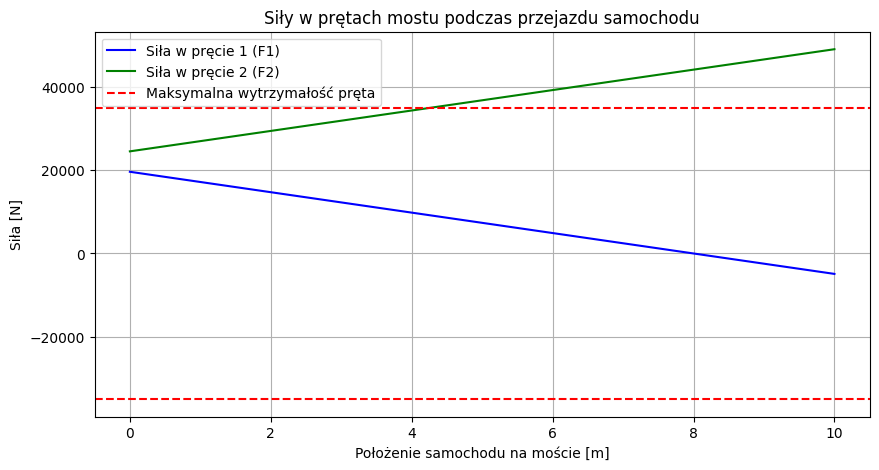

Most się zawali!


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Dane
m = 1500  # masa samochodu [kg]
M = 2 * m  # masa mostu [kg]
L = 10  # długość mostu [m]
d1 = 1  # odległość pręta 1 od lewego końca [m]
d2 = 3  # odległość pręta 2 od prawego końca [m]
g = 9.81  # przyspieszenie ziemskie [m/s^2]
v = 7.2 / 3.6  # prędkość samochodu w m/s
P_max = 35000  # maksymalna siła prętów [N]
N_max = 50000  # maksymalne naprężenie belki [N]

# Siła ciężkości
G_most = M * g
G_samochod = m * g

# Funkcja obciążenia - równowaga momentów i sił
def oblicz_sily(x):
    """
    Oblicza siły F1 i F2 w zależności od położenia samochodu na moście.
    """
    # Moment sił względem pręta 1
    moment_mostu = G_most * (L / 2)
    moment_samochodu = G_samochod * x
    
    # Układ równań: sumujemy momenty względem pręta 1
    F2 = (moment_mostu + moment_samochodu) / (L - d1 - d2)
    
    # Równowaga sił pionowych: F1 + F2 = G_most + G_samochod
    F1 = G_most + G_samochod - F2
    
    return F1, F2

# Przemieszczenie samochodu po moście (od x=0 do x=L)
x_vals = np.linspace(0, L, 100)
F1_vals = []
F2_vals = []

for x in x_vals:
    F1, F2 = oblicz_sily(x)
    F1_vals.append(F1)
    F2_vals.append(F2)

# Rysowanie wykresów
plt.figure(figsize=(10,5))
plt.plot(x_vals, F1_vals, label='Siła w pręcie 1 (F1)', color='blue')
plt.plot(x_vals, F2_vals, label='Siła w pręcie 2 (F2)', color='green')
plt.axhline(P_max, color='r', linestyle='--', label='Maksymalna wytrzymałość pręta')
plt.axhline(-P_max, color='r', linestyle='--')
plt.xlabel("Położenie samochodu na moście [m]")
plt.ylabel("Siła [N]")
plt.legend()
plt.title("Siły w prętach mostu podczas przejazdu samochodu")
plt.grid()
plt.show()

# Sprawdzenie, czy most się zarwie
max_F1 = max(F1_vals)
max_F2 = max(F2_vals)
if max_F1 > P_max or max_F2 > P_max:
    print("Most się zawali!")
else:
    print("Most wytrzyma przejazd samochodu.")



Zadanie 2.
Przedstawiony jest most złożony z czarnych belek, każda o masie m i niebieskich bloków podłoża, każdy o masie M. Belki i bloki są jednakowej długości.
* Zanalizuj siły działające w punktach A, B, C, D.
* Rozważmy przedłużony most składany w ten sam sposób. Oznaczając siłę maksymalnego naprężenia belki jako N, oblicz z jakiej maksymalnej długości może składać się most. Wyraź ją jako wielokrotność długości belki. Most jest połączony z ziemią tylko poprzez podpory, a odległość pomiędzy początkiem mostu a ziemią jest pomijalna.

In [3]:
# Analiza sił w punktach A, B, C, D
print("\nAnaliza sił w punktach A, B, C, D")
F_A = G_most / 2  # Siła w punkcie A
F_B = G_most / 2  # Siła w punkcie B (równomierny podział obciążenia)
F_C = N_max / 2   # Zakładana maksymalna siła w punkcie C
F_D = N_max / 2   # Zakładana maksymalna siła w punkcie D

print(f"Siła w punkcie A: {F_A:.2f} N")
print(f"Siła w punkcie B: {F_B:.2f} N")
print(f"Siła w punkcie C: {F_C:.2f} N")
print(f"Siła w punkcie D: {F_D:.2f} N")

# Obliczenie maksymalnej długości mostu
l_belki = 2  # długość jednej belki [m]
n_max = N_max / (M * g / l_belki)  # maksymalna liczba segmentów
L_max = n_max * l_belki  # maksymalna długość mostu

print(f"Maksymalna długość mostu: {L_max:.2f} m")


Analiza sił w punktach A, B, C, D
Siła w punkcie A: 14715.00 N
Siła w punkcie B: 14715.00 N
Siła w punkcie C: 25000.00 N
Siła w punkcie D: 25000.00 N
Maksymalna długość mostu: 6.80 m


Zadanie 3. (tu : przykładowa odległość między krańcami mostu - 50 metrów).
Przedstawiony uproszczony model mostu łukowego składającego się z jednego łuku. Twoim celem jest zbudowanie wytrzymałego mostu potrafiącego utrzymać masę m na jego środku. Oznaczmy masę na jednostkę długości budulca mostu jako λ, a odległość między końcami mostu jako d. Oblicz minimalną długość używanego materiału, zakładając, że jego maksymalne naprężenie wynosi N.

In [4]:
# Most łukowy
d = float(input("Podaj odległość między końcami mostu [m]: "))  # Odległość między końcami mostu [m]
R = d / 2  # Przyjmujemy, że most to półokrąg
L_luk = np.pi * R  # Długość mostu łukowego
print(f"Minimalna długość materiału do budowy mostu łukowego: {L_luk:.2f} m")


Minimalna długość materiału do budowy mostu łukowego: 78.54 m


Zadanie 4. (tu : przy przykładowej liczbie kart 20 i długości jednej karty 0.15 m).
Rozważmy schody zbudowane z kart o tej samej długości i masie. Oblicz teoretycznie maksymalną długość mostu złożonego z takich schodów jaki można wybudować przy założeniu, że możemy stawiać karty tylko jedna na drugiej (rysunek schematyczny jest widoczny poniżej). Most musi utrzymać zaledwie sam siebie, nie musi unosić żadnej dodatkowej masy.

In [5]:
# Most z kart
print("\nObliczanie maksymalnej długości mostu z kart")
N = int(input("Podaj liczbę kart: "))  # Liczba kart w stosie
l_karty = float(input("Podaj długość jednej karty [m]: "))
L_karty = sum(l_karty / (2 * n) for n in range(1, N + 1))
print(f"Maksymalna długość mostu z kart: {L_karty:.2f} m")


Obliczanie maksymalnej długości mostu z kart
Maksymalna długość mostu z kart: 0.27 m


Zadanie 5.
Masz 5 godzin na zaprojektowanie i zbudowanie mostu z drewnianych patyczków.
Przemyśl dokładnie strategię na takie zadanie oraz napisz ramowy plan postępowania, który pozwoli na zrealizowanie zadania w wyznaczonym czasie. Uwzględnij w planie np. przygotowanie do budowy, potrzebne materiały i narzędzia, montaż. Pamiętaj, aby nie projektować konkretnego mostu, ale stworzyć jedynie plan, który będzie uniwersalny dla różnych projektów tego typu.

In [6]:
#ostatni krok - budowa własnego mostu - plan
def przygotowanie_do_budowy():
    plan = """
Plan działania na zbudowanie mostu z patyczków - 5 godzin:

1. Przygotowanie (0:00 - 0:30)
   - Przeanalizuj projekt mostu i jego wymiarów
   - Przygotuj miejsce pracy (czysta powierzchnia, odpowiednie oświetlenie)
   - Upewnij się, że masz wszystkie potrzebne materiały i narzędzia

2. Materiały (0:30 - 1:00)
   - Patyczki do lodów lub drewniane patyczki
   - Klej (najlepiej klej na gorąco lub klej do drewna)
   - Nożyczki lub nożyk
   - Taśma klejąca (opcjonalnie)
   - Ołówek i linijka

3. Narzędzia (1:00 - 1:30)
   - Przygotuj narzędzia: klej na gorąco, nożyczki, nożyk, linijkę
   - Sprawdź, czy klej na gorąco jest gotowy do użycia (rozgrzany)
   - Upewnij się, że narzędzia są ostre i działają poprawnie

4. Montaż (1:30 - 4:30)
   - Rozpocznij od budowy fundamentów mostu
   - Sklejaj patyczki, tworząc stabilne połączenia
   - Montuj kolejne segmenty mostu, upewniając się, że są one stabilne i równe
   - Pozwól klejowi wyschnąć odpowiednio między kolejnymi etapami montażu
   - Regularnie sprawdzaj wymiary i wytrzymałość konstrukcji

5. Wykończenie (4:30 - 5:00)
   - Sprawdź całą konstrukcję pod kątem stabilności i wytrzymałości
   - Dokonaj ewentualnych poprawek lub wzmocnień
   - Pozwól klejowi całkowicie wyschnąć
   - Posprzątaj miejsce pracy

Powodzenia w budowie mostu z patyczków!
"""
    return plan

def main():
    print("Gratulacje! Pora na budowę własnego mostu. Jesteś gotowy/a?")
    odpowiedz = input().strip().lower()
    if odpowiedz in ["tak", "yes", "y", "t", "oczywiście", "gotowy", "gotowa"]:
        plan = przygotowanie_do_budowy()
        print(plan)
    else:
        print("Gdy będziesz gotowy/a, uruchom program ponownie.")

# Uruchomienie głównej funkcji programu
if __name__ == "__main__":
    main()

Gratulacje! Pora na budowę własnego mostu. Jesteś gotowy/a?

Plan działania na zbudowanie mostu z patyczków - 5 godzin:

1. Przygotowanie (0:00 - 0:30)
   - Przeanalizuj projekt mostu i jego wymiarów
   - Przygotuj miejsce pracy (czysta powierzchnia, odpowiednie oświetlenie)
   - Upewnij się, że masz wszystkie potrzebne materiały i narzędzia

2. Materiały (0:30 - 1:00)
   - Patyczki do lodów lub drewniane patyczki
   - Klej (najlepiej klej na gorąco lub klej do drewna)
   - Nożyczki lub nożyk
   - Taśma klejąca (opcjonalnie)
   - Ołówek i linijka

3. Narzędzia (1:00 - 1:30)
   - Przygotuj narzędzia: klej na gorąco, nożyczki, nożyk, linijkę
   - Sprawdź, czy klej na gorąco jest gotowy do użycia (rozgrzany)
   - Upewnij się, że narzędzia są ostre i działają poprawnie

4. Montaż (1:30 - 4:30)
   - Rozpocznij od budowy fundamentów mostu
   - Sklejaj patyczki, tworząc stabilne połączenia
   - Montuj kolejne segmenty mostu, upewniając się, że są one stabilne i równe
   - Pozwól klejowi wysch